<h1><center> Arrival Time Visualization <br><br> 
<center> Differential Privacy Application<br><br> 
Wendy Shi</center></center>


# TOC

- [Pii](#P_ii)
- [Pij](#Pij-visualization,-box-plot)
- [Number of links being zeros](#Count-the-total-number-of-zeros)

# Preparation

In [1]:
#Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy.stats as stats
import statistics

# Original weight matrix

In [2]:
Ori_mt = pd.read_csv("WA_Data/Aggregate/WA_ori_indi.csv")
Ori_mt = Ori_mt.drop(columns = 'Unnamed: 0')

P5_mt = pd.read_csv("WA_Data/Aggregate/WA_P5_agg.csv")
P5_mt = P5_mt.drop(columns = 'Unnamed: 0')

P1_mt = pd.read_csv("WA_Data/Aggregate/WA_P1_agg.csv")
P1_mt = P1_mt.drop(columns = 'Unnamed: 0')

P05_mt = pd.read_csv("WA_Data/Aggregate/WA_P05_agg.csv")
P05_mt = P05_mt.drop(columns = 'Unnamed: 0')

P01_mt = pd.read_csv("WA_Data/Aggregate/WA_P01_agg.csv")
P01_mt = P01_mt.drop(columns = 'Unnamed: 0')

P005_mt = pd.read_csv("WA_Data/Aggregate/WA_P005_agg.csv")
P005_mt = P005_mt.drop(columns = 'Unnamed: 0')

P001_mt = pd.read_csv("WA_Data/Aggregate/WA_P001_agg.csv")
P001_mt = P001_mt.drop(columns = 'Unnamed: 0')

In [3]:
P01_mt.head(3)

,53001,53003,53005,53007,53009,53011,53015,53017,53021,53025,...,53057,53059,53061,53063,53065,53067,53071,53073,53075,53077
0,0.354696,0.000000,0.057518,0.027049,0.000000,0.025429,0.0,0.013412,0.054053,0.038031,...,0.0,0.013142,0.019533,0.085062,0.005446,0.000000,0.011882,0.050947,0.000000,0.026959
1,0.000380,0.783286,0.002357,0.004867,0.011558,0.000000,0.0,0.002357,0.000000,0.000000,...,0.0,0.000000,0.036955,0.012318,0.006768,0.010646,0.006235,0.013231,0.021481,0.001217
2,0.004201,0.000000,0.604455,0.009393,0.000000,0.000000,0.0,0.000000,0.169812,0.005157,...,0.0,0.000000,0.019718,0.050040,0.004492,0.008171,0.004953,0.021140,0.005439,0.040018


In [4]:
Original_np = Ori_mt.to_numpy()
P5_np = P5_mt.to_numpy()
P1_np = P1_mt.to_numpy()
P05_np = P05_mt.to_numpy()
P01_np = P01_mt.to_numpy()
P005_np = P005_mt.to_numpy()
P001_np = P001_mt.to_numpy()

# P_ii

In [5]:
ori_list = [Original_np[i][i] for i in range(34)]
P5_list = [P5_np[i][i] for i in range(34)]
P1_list = [P1_np[i][i] for i in range(34)]
P05_list = [P05_np[i][i] for i in range(34)]
P01_list = [P01_np[i][i] for i in range(34)]
P005_list = [P005_np[i][i] for i in range(34)]
P001_list = [P001_np[i][i] for i in range(34)]

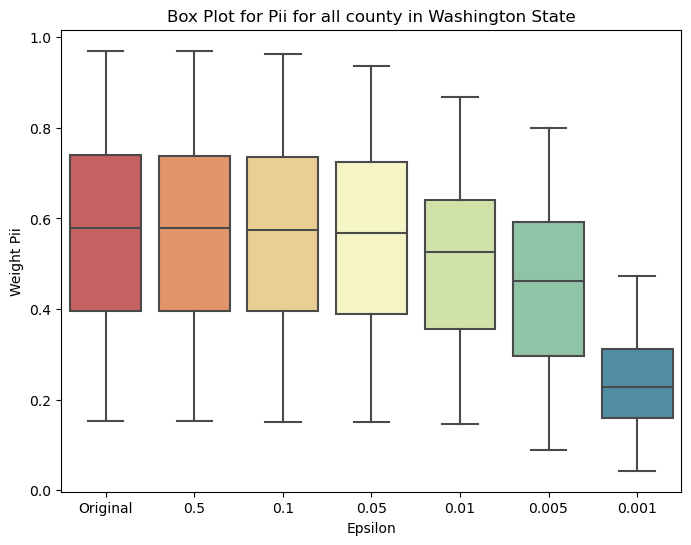

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [ori_list, P5_list, P1_list, P05_list, P01_list, P005_list, P001_list]
#data = [ori_list, P5_list, P1_list, P05_list, P01_list]

color = sns.color_palette("Spectral", n_colors=7)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Original', '0.5', '0.1', '0.05', '0.01','0.005', '0.001'])
#plt.xticks([0, 1, 2, 3, 4], ['Original', '0.5', '0.1', '0.05', '0.01'])
plt.title("Box Plot for Pii for all county in Washington State")
plt.ylabel("Weight Pii")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pii_staying_agg_WA.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


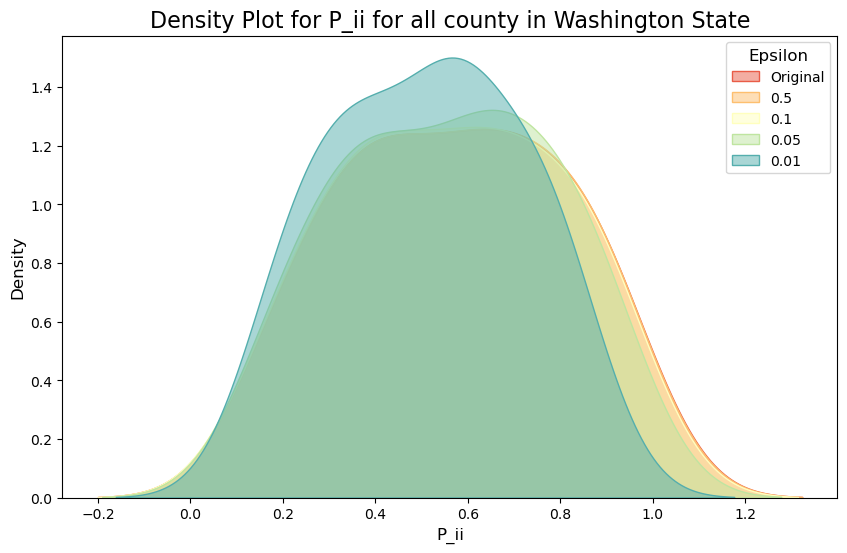

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
#data = [ori_list, P5_list, P1_list, P05_list, P01_list, P005_list, P001_list]
data = [ori_list, P5_list, P1_list, P05_list, P01_list]
labels = ['Original', '0.5', '0.1', '0.05', '0.01']

# Generate a color palette
color = sns.color_palette("Spectral", n_colors=5)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Loop through datasets to plot their density
for i, dataset in enumerate(data):
    sns.kdeplot(dataset, label=labels[i], color=color[i], fill=True, alpha=0.5)

# Adding labels and title
plt.title("Density Plot for P_ii for all county in Washington State", fontsize=16)
plt.xlabel("P_ii", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Adding a legend
plt.legend(title="Epsilon", fontsize=10, title_fontsize=12)

# Save plot (optional)
#plt.savefig("Pii_Density_Plot_all_agg.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Pij visualization, box plot

In [10]:
import math

In [11]:
def outflow_wt(matrix):
    
    '''
    This function defines mean out flow rate by county
    '''
    
    P_ij_list = []
    
    for i in range(55):
        #all outflow weight list every county
        working_list = []
        for j in range(55):
            if i != j:
                working_list.append(matrix[i][j])
                
        average =np.mean(working_list)        
        P_ij_list.append(average)
        
    return(P_ij_list)

In [16]:
def outflow_wt_all(matrix):
    
    '''
    
    This function defines all outflow rate
    
    '''
    
    P_ij = []
    
    for i in range(34):
        for j in range(34):
            if i != j:
                P_ij.append(matrix[i][j])
                
    return(P_ij)

In [17]:
def out_stat(data):
    
    series = pd.Series(data)
    
    #This print summary statistics
    minimum = series.min()
    point25 = series.quantile(0.25)
    median = series.median()
    point75 = series.quantile(0.75)
    maximum = series.max()
     
    #This print the summary statistcis    
    out_list = [minimum, point25, median, point75, maximum]
    print(out_list)
    
    #This only takes the first 75% of the data
    plotting_data = [i for i in data if i < point75]
    
    return(plotting_data)

In [18]:
import math

In [19]:
out_ori = outflow_wt_all(Original_np)
print(len(out_ori))
#ori_75 = out_stat(out_ori)

1122


In [20]:
log_ori = [math.log(x) for x in out_ori if x != 0]
print(len(log_ori))

974


In [21]:
out_P5 = outflow_wt_all(P5_np)
log_P5 = [math.log(x) for x in out_P5 if x != 0]
print(len(log_P5))

955


In [22]:
out_P1 = outflow_wt_all(P1_np)
log_P1 = [math.log(x) for x in out_P1 if x != 0]
print(len(log_P1))

891


In [23]:
out_P05 = outflow_wt_all(P05_np)
log_P05 = [math.log(x) for x in out_P05 if x != 0]
print(len(log_P05))

853


In [24]:
out_P01 = outflow_wt_all(P01_np)
log_P01 = [math.log(x) for x in out_P01 if x != 0]
print(len(log_P01))

714


In [25]:
out_P005 = outflow_wt_all(P005_np)
log_P005 = [math.log(x) for x in out_P005 if x != 0]
print(len(log_P005))

681


In [26]:
out_P001 = outflow_wt_all(P001_np)
log_P001 = [math.log(x) for x in out_P001 if x != 0]
print(len(log_P001))

590


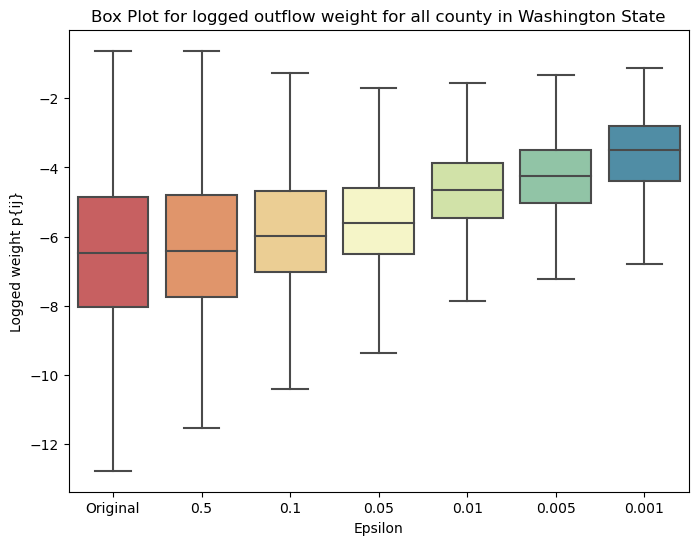

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
#data = [out_ori, out_P5, out_P1, out_P05, out_P01, out_P005, out_P001]
data = [log_ori, log_P5, log_P1, log_P05, log_P01, log_P005, log_P001]
#data = [log_ori, log_P5, log_P1, log_P05, log_P01]

color = sns.color_palette("Spectral", n_colors=7)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5, 6], 
           ['Original', '0.5','0.1','0.05','0.01', '0.005','0.001'])
#plt.xticks([0, 1, 2, 3, 4], 
#           ['Original', '0.5','0.1','0.05','0.01'])
plt.title("Box Plot for logged outflow weight for all county in Washington State")
plt.ylabel("Logged weight p{ij}")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pij_outflow_logged_no_outlier_WA_agg.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Count the total number of zeros

In [32]:
#outflow zero
def outflow_zero(matrix):
    P_ij_zero = []
    
    for i in range(34):
        #all outflow weight list every county
        working_list = []
        for j in range(34):
            if i != j and matrix[i][j] == 0:
                P_ij_zero.append((i,j))
    
    return(P_ij_zero)

In [33]:
total_links = 34*34

In [34]:
zero_ori = outflow_zero(Original_np)
len(zero_ori)

148

In [35]:
zero_P5 = outflow_zero(P5_np)
len(zero_P5)

167

In [36]:
zero_P1 = outflow_zero(P1_np)
len(zero_P1)

231

In [37]:
zero_P05 = outflow_zero(P05_np)
len(zero_P05)

269

In [38]:
zero_P01 = outflow_zero(P01_np)
len(zero_P01)

408

In [39]:
zero_P005 = outflow_zero(P005_np)
len(zero_P005)

441

In [40]:
zero_P001 = outflow_zero(P001_np)
len(zero_P001)

532

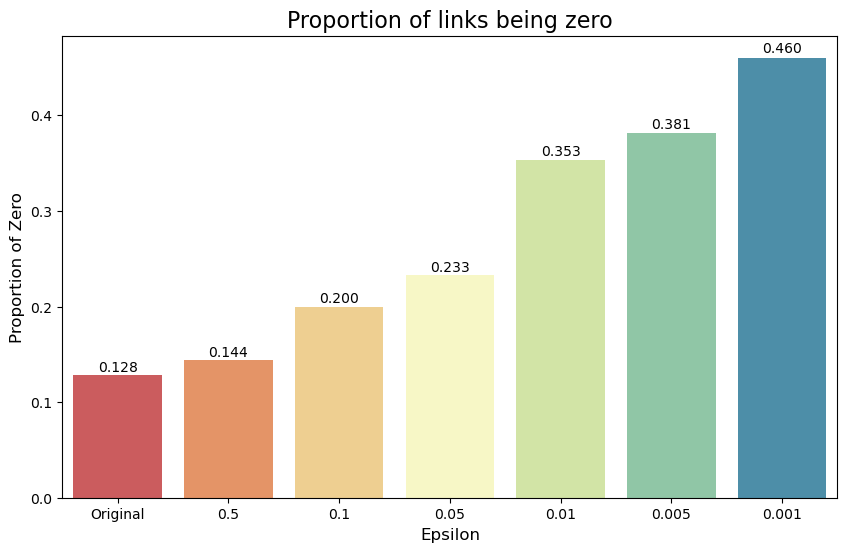

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = [len(zero_ori)/total_links, 
        len(zero_P5)/total_links, 
        len(zero_P1)/total_links, 
        len(zero_P05)/total_links, 
        len(zero_P01)/total_links,
       len(zero_P005)/total_links,
        len(zero_P001)/total_links
       ]
labels = ['Original', '0.5', '0.1', '0.05', '0.01', '0.005', '0.001']
#labels = ['Original', '0.5', '0.1', '0.05', '0.01']

# Generate a color palette
color = sns.color_palette("Spectral", n_colors= 7)

# Create a DataFrame for easier handling
df = pd.DataFrame({'Epsilon': labels, 'Number of Zero': data})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Epsilon', y='Number of Zero', palette=color, data=df)

# Adding labels and title
plt.title("Proportion of links being zero", fontsize=16)
plt.xlabel("Epsilon", fontsize=12)
plt.ylabel("Proportion of Zero", fontsize=12)

# Add data labels on each bar
for i, bar in enumerate(barplot.patches):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar_height*1.005,  # y-coordinate slightly above the bar
        f'{bar_height:.3f}',  # Data label
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Save plot (optional)
plt.savefig("Proportion_of_Zero_agg_WA.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
